# Solar Orbiter paper on first ICME April 2020

## Figure 1, positions, in situ data Solar Orbiter (mag), Wind (mag and plasma)

In [127]:
import numpy as np
import scipy.io
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import  DateFormatter
from datetime import timedelta
import seaborn as sns
import datetime
import astropy
import astropy.constants as constb
from sunpy.time import parse_time
import time
import pickle
import sys
import os
import urllib
import json
import importlib
import pandas as pd
import copy
import openpyxl
import h5py
import heliopy.data.spice as spicedata
import heliopy.spice as spice
import heliosat

#because script is not in root directory of package
#sys.path.append('/Users/chris/python/heliocats')
sys.path.append('/home/cmoestl/pycode/heliocats')
import heliocats.data as hd
from config import data_path

from astropy.constants import au
#define AU in km
AU=au.value/1e3

## load in situ data and positions

In [128]:
filemag=data_path+'solo_2020_icme_april_rtn.p'
sm=pickle.load(open(filemag, "rb" ) ) 

filewin=data_path+'wind_2018_2020_oct_gse.p'
[win,hwin]=pickle.load(open(filewin, "rb" ) )

filebepi='bepi_2020_icme_april_hee.p'
bm=pickle.load(open(data_path+filebepi, "rb" ) )      

#set bepi mag to nan after Apr 21
nanind=np.where(bm.time > parse_time('2020-04-21 18:00').datetime)

bm.bt[nanind]=np.nan
bm.bx[nanind]=np.nan
bm.by[nanind]=np.nan
bm.bz[nanind]=np.nan


#same for orbiter
nanind=np.where(np.logical_and(sm.time > parse_time('2020-04-21 00:00').datetime, sm.time < parse_time('2020-04-22 00:00').datetime)  )
sm.bt[nanind]=np.nan
sm.bx[nanind]=np.nan
sm.by[nanind]=np.nan
sm.bz[nanind]=np.nan




[psp, bepi, solo, sta, earth, venus, mars, mercury,frame]= \
      pickle.load( open( '../data/positions_psp_solo_bepi_sta_planets_HEEQ_1hour.p', "rb" ))


############################# HUX

wsa=np.loadtxt('../data/thux/wsa-vmap-19apr2020.txt')
wsa_all=np.loadtxt('../data/thux/wsa-planets-missions-cr2047-cr2234.txt',skiprows=1)

#convert matlab time to matplotlib time

wsa_all_datetime=[None]*len(wsa_all)
for p in np.arange(len(wsa_all)):
        wsa_all_datetime[p]= datetime.datetime.fromordinal(wsa_all[p,0].astype(int) ) + \
        datetime.timedelta(days=wsa_all[p,0]%1) - datetime.timedelta(days = 366) 


#vEarth	vMercury	vVenus	vMars	vBepi	vPSP	vSOLO	vSTEREOA	vSTEREOB
wsa_all_earth=wsa_all[:,1]
wsa_all_solo=wsa_all[:,7]
wsa_all_sta=wsa_all[:,8]




################### THUX

wsa_thux=np.loadtxt('../data/thux/wsa-vmap-19apr2020-v2.txt')
wsa_apr_thux=np.loadtxt('../data/thux/wsa-planets-missions-19apr2020.txt',skiprows=1)

#convert matlab time to matplotlib time

wsa_apr_thux_datetime=[None]*len(wsa_apr_thux)
for p in np.arange(len(wsa_apr_thux)):
        wsa_apr_thux_datetime[p]= datetime.datetime.fromordinal(wsa_apr_thux[p,0].astype(int) ) + \
        datetime.timedelta(days=wsa_apr_thux[p,0]%1) - datetime.timedelta(days = 366) 


#vEarth	vMercury	vVenus	vMars	vBepi	vPSP	vSOLO	vSTEREOA	vSTEREOB
wsa_apr_thux_earth=wsa_apr_thux[:,1]
wsa_apr_thux_solo=wsa_apr_thux[:,7]
wsa_apr_thux_sta=wsa_apr_thux[:,8]


print('done')

done


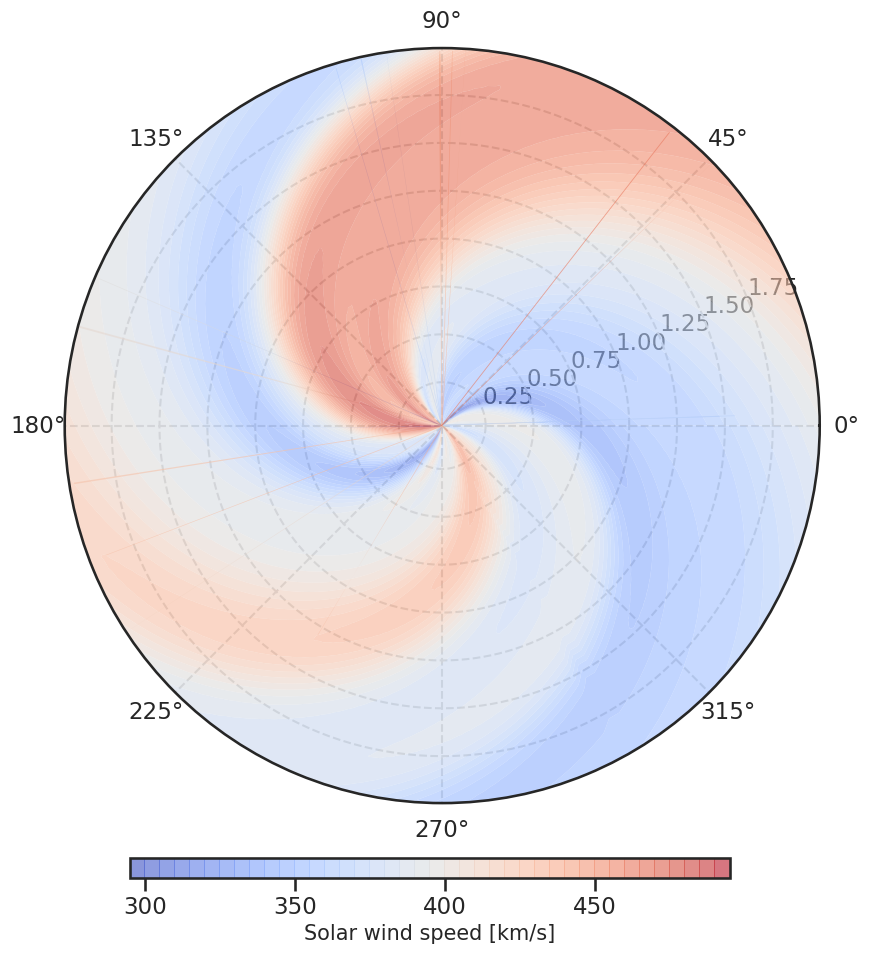

In [116]:
def plot_bgsw(ax,cbarax):

    
    #for rotation
    #k=0
    #CR 2229	2020 Mar 28	0853 start
    #k=14
    #rotSun = 27.2753
    #rotAngle = (2 * np.pi / rotSun) * k #+np.pi/2 
    #rotAngle = (2 * np.pi / rotSun) * k  

    thetaLen=180
    rLen=425
    r_sun = 695700.
    au = 149597870.
    startBGSW = 5

    #grid
    angle = np.deg2rad(np.arange(0, 362, 362 / thetaLen)) #+ np.deg2rad(-90) #+ rotAngle    
    radius = np.arange(startBGSW, rLen + startBGSW) / au * r_sun
    thetaBGSW, rBGSW = np.meshgrid(angle, radius)

    ## HUX
    
    #wsafin =copy.deepcopy(wsa)
    
    #levels = np.arange(np.round(np.min(wsafin))+1, np.max(wsafin), 5)

    #cf = ax.contourf(thetaBGSW.T, rBGSW.T, np.flip(wsafin,axis=1).T, levels,
    #                 cmap=plt.cm.get_cmap('coolwarm'), alpha=0.9,
    #                 vmin=np.min(wsafin), vmax=np.max(wsafin),antialiased=True)

    #cf = ax.contourf(thetaBGSW.T, rBGSW.T, wsafin.T,levels,
    #                 cmap=plt.cm.get_cmap('coolwarm'), alpha=0.5,antialiased=True)

    #cf = ax.contourf(thetaBGSW.T, rBGSW.T, np.flip(wsafin,axis=1).T,levels,
    #                 cmap=plt.cm.get_cmap('coolwarm'), alpha=0.5,antialiased=True)

    ##### THUX

    levels = np.arange(np.round(np.min(wsa_thux)), np.max(wsa_thux), 5)
    
    cf = ax.contourf(thetaBGSW.T, rBGSW.T, np.flip(wsa_thux,axis=1).T,levels,
                     cmap=plt.cm.get_cmap('coolwarm'),vmin=np.min(wsa_thux), 
                     vmax=np.max(wsa_thux),alpha=0.6,antialiased=True)


    
    # This is the fix for the white lines between contour levels
    #for c in cf.collections:
    #    c.set_edgecolor('face')
    #    c.set_linewidth( 0.1 ) 
        
        

    cax = plt.axes(cbarax)
    cbar = plt.colorbar(cf, cax=cax, ticks=np.arange(200, 600, 50),orientation="horizontal")
    ticklabs = cbar.ax.get_yticklabels()
    cbar.ax.set_yticklabels(ticklabs, fontsize=15)
    cbar.set_label('Solar wind speed [km/s]', fontsize=15)


    #ax.set_ylim(0, 1.2) 
    #ax.grid(False)


plt.figure(1,figsize=(10, 10),dpi=100)


ax1 = plt.subplot2grid((1, 1), (0, 0),projection='polar') 


cbarax1=[0.2, 0.05, 0.6, 0.02]

plot_bgsw(ax1,cbarax1)
#plot_bgsw(ax1,cbarax1)


## Results

In [120]:
#%matplotlib inline
#%matplotlib
#hp.plot_insitu_measure(sm, '2020-Apr-18 12:00','2020-Apr-21 12:00', 'Solo', 'results/')
#hp.plot_insitu_measure(win, '2020-Apr-18 12:00','2020-Apr-23 12:00', 'Wind', 'results/')

######################### solo
sicme_start_time=parse_time('2020-04-19T05:07Z').datetime
smo_start_time=parse_time('2020-04-19T08:59Z').datetime
smo_end_time=parse_time('2020-04-20T09:15Z').datetime

print('SolO times:',sicme_start_time, smo_start_time,smo_end_time)

#index of times
sicme_start_ind=np.where(sicme_start_time==sm.time)[0][0]
smo_start_ind=np.where(smo_start_time==sm.time)[0][0]
smo_end_ind=np.where(smo_end_time==sm.time)[0][0]

print('HEEQ position of SolO r/lat/lon at icme_start_time:',np.round(sm.r[sicme_start_ind],3),np.round(sm.lat[sicme_start_ind],2),np.round(sm.lon[sicme_start_ind],2))
print('HEEQ position of SolO r/lat/lon at mo_start_time:',np.round(sm.r[smo_start_ind],3),np.round(sm.lat[smo_start_ind],2),np.round(sm.lon[smo_start_ind],2))
print('HEEQ position of SolO r/lat/lon at mo_end_time:',np.round(sm.r[smo_end_ind],3),np.round(sm.lat[smo_end_ind],2),np.round(sm.lon[smo_end_ind],2))



print('SolO ICME duration hours ', np.round((smo_end_time-sicme_start_time).total_seconds()/3600,2))
print('SolO MO duration hours ', np.round((smo_end_time-smo_start_time).total_seconds()/3600,2))
print()

########################## Wind
wicme_start_time=parse_time('2020-04-20T01:34Z').datetime
wmo_start_time=parse_time('2020-04-20T07:56Z').datetime
#alternative wmo_start_time=parse_time('2020-04-20T06:37Z').datetime
wmo_end_time=parse_time('2020-04-21T11:18Z').datetime

print('Wind times:',wicme_start_time, wmo_start_time,wmo_end_time)
print('Wind ICME duration hours ', np.round((wmo_end_time-wicme_start_time).total_seconds()/3600,2))
print('Wind MO duration hours ', np.round((wmo_end_time-wmo_start_time).total_seconds()/3600,2))


#index of times
wicme_start_ind=np.where(wicme_start_time==win.time)[0][0]
wmo_start_ind=np.where(wmo_start_time==win.time)[0][0]
wmo_end_ind=np.where(wmo_end_time==win.time)[0][0]

print('HEEQ position of Wind r/lat/lon at icme_start_time:',np.round(win.r[wicme_start_ind],3),np.round(win.lat[wicme_start_ind],2),np.round(win.lon[wicme_start_ind],2))
print('HEEQ position of Wind r/lat/lon at mo_start_time:',np.round(win.r[wmo_start_ind],3),np.round(win.lat[wmo_start_ind],2),np.round(win.lon[wmo_start_ind],2))
print('HEEQ position of Wind r/lat/lon at mo_end_time:',np.round(win.r[wmo_end_ind],3),np.round(win.lat[wmo_end_ind],2),np.round(win.lon[wmo_end_ind],2))

print()

########################## Bepi
bicme_start_time=parse_time('2020-04-20T03:09Z').datetime
bmo_start_time=parse_time('2020-04-20T08:05Z').datetime
bmo_end_time=parse_time('2020-04-21T10:08Z').datetime


print('Bepi times:',bicme_start_time, bmo_start_time,bmo_end_time)
print('Bepi ICME duration hours ', np.round((bmo_end_time-bicme_start_time).total_seconds()/3600,2))
print('Bepi MO duration hours ', np.round((bmo_end_time-bmo_start_time).total_seconds()/3600,2))


#index of times
bicme_start_ind=np.where(bicme_start_time==bm.time)[0][0]
bmo_start_ind=np.where(bmo_start_time==bm.time)[0][0]
bmo_end_ind=np.where(bmo_end_time==bm.time)[0][0]

print('HEEQ position of Bepi r/lat/lon at icme_start_time:',np.round(bm.r[bicme_start_ind],3),np.round(bm.lat[bicme_start_ind],2),np.round(bm.lon[bicme_start_ind],2))
print('HEEQ position of Bepi r/lat/lon at mo_start_time:',np.round(bm.r[bmo_start_ind],3),np.round(bm.lat[bmo_start_ind],2),np.round(bm.lon[bmo_start_ind],2))
print('HEEQ position of Bepi r/lat/lon at mo_end_time:',np.round(bm.r[bmo_end_ind],3),np.round(bm.lat[bmo_end_ind],2),np.round(bm.lon[bmo_end_ind],2))




SolO times: 2020-04-19 05:07:00 2020-04-19 08:59:00 2020-04-20 09:15:00
HEEQ position of SolO r/lat/lon at icme_start_time: 0.806 -3.9 -4.61
HEEQ position of SolO r/lat/lon at mo_start_time: 0.805 -3.89 -4.56
HEEQ position of SolO r/lat/lon at mo_end_time: 0.799 -3.77 -4.28
SolO ICME duration hours  28.13
SolO MO duration hours  24.27

Wind times: 2020-04-20 01:34:00 2020-04-20 07:56:00 2020-04-21 11:18:00
Wind ICME duration hours  33.73
Wind MO duration hours  27.37
HEEQ position of Wind r/lat/lon at icme_start_time: 0.996 -5.21 0.19
HEEQ position of Wind r/lat/lon at mo_start_time: 0.996 -5.19 0.19
HEEQ position of Wind r/lat/lon at mo_end_time: 0.996 -5.09 0.18

Bepi times: 2020-04-20 03:09:00 2020-04-20 08:05:00 2020-04-21 10:08:00
Bepi ICME duration hours  30.98
Bepi MO duration hours  26.05
HEEQ position of Bepi r/lat/lon at icme_start_time: 1.011 -5.53 -1.24
HEEQ position of Bepi r/lat/lon at mo_start_time: 1.011 -5.52 -1.26
HEEQ position of Bepi r/lat/lon at mo_end_time: 1.011 

### Make plot 

HEEQ
current frame_time_num 2020-04-20 00:00:00+00:00


/home/cmoestl/miniconda/envs/helio/lib/python3.7/site-packages/ipykernel_launcher.py:286: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


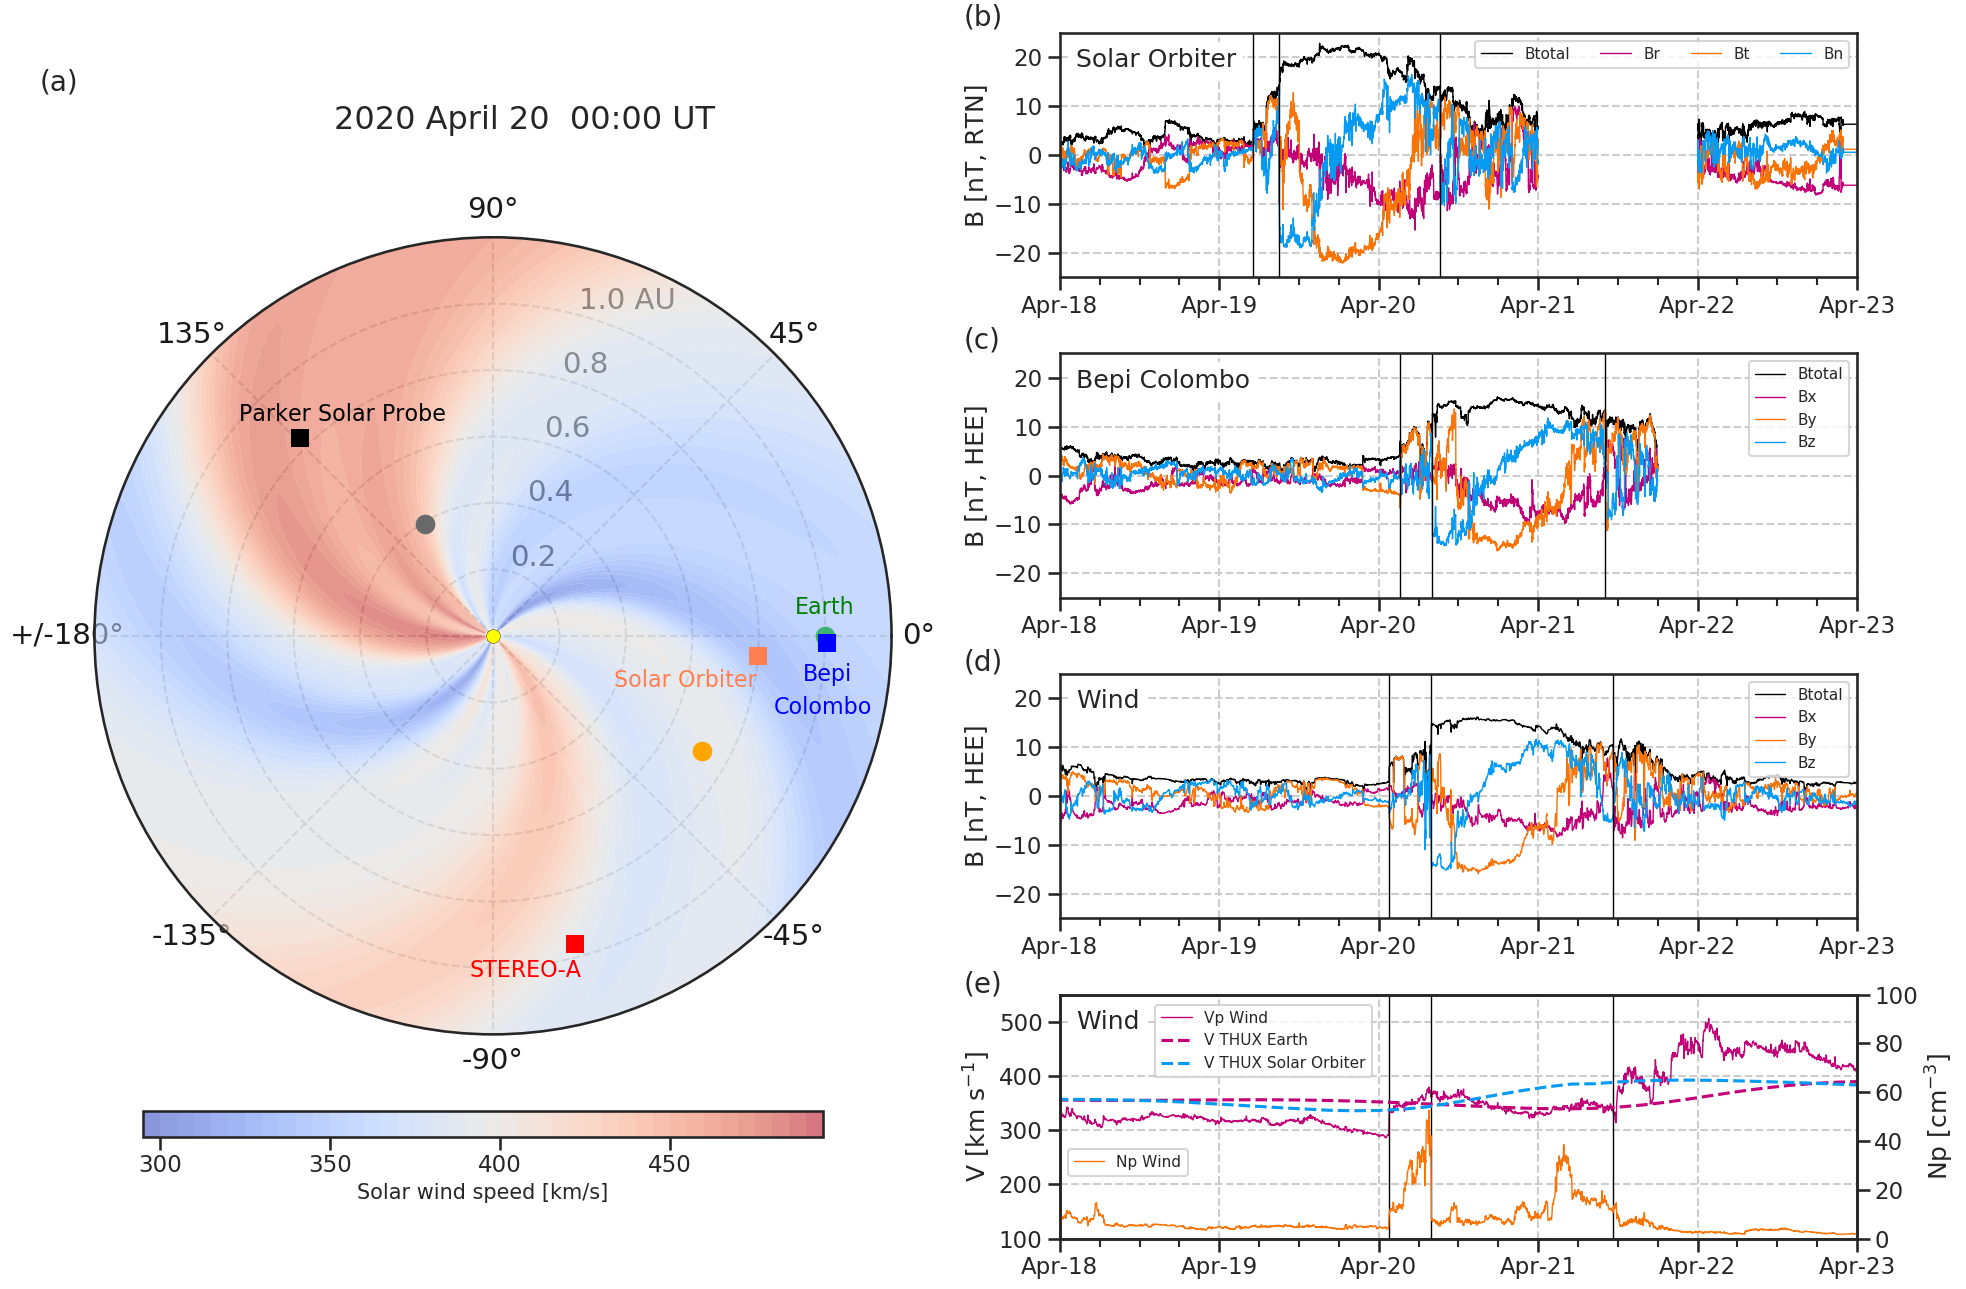

In [118]:
sns.set_context("talk")     
#sns.set_style('darkgrid')
sns.set_style('whitegrid')
sns.set_style("ticks",{'grid.linestyle': '--'})


#set wind awkward data points to nan
windspike_ind=np.where(win.time > parse_time('2020-04-20 17:08').datetime)[0]
win.bt[windspike_ind[0:2]]=np.nan
win.bx[windspike_ind[0:2]]=np.nan
win.by[windspike_ind[0:2]]=np.nan
win.bz[windspike_ind[0:2]]=np.nan


#set wind awkward data points to nan
windspike_ind=np.where(win.time > parse_time('2020-04-21 01:20').datetime)[0]
win.bt[windspike_ind[0:1]]=np.nan
win.bx[windspike_ind[0:1]]=np.nan
win.by[windspike_ind[0:1]]=np.nan
win.bz[windspike_ind[0:1]]=np.nan


plotstart=datetime.datetime(2020, 4, 18)
plotend=datetime.datetime(2020, 4,23)
blim=25





plt.figure(1,figsize=(20, 13),dpi=100)

#define subplot grid
ax1 = plt.subplot2grid((4, 2), (0, 1))  #solo b
ax2 = plt.subplot2grid((4, 2), (1, 1))  #bepib
ax3 = plt.subplot2grid((4, 2), (2, 1))  #wind b
ax4 = plt.subplot2grid((4, 2), (3, 1))  #wind v


ax5 = plt.subplot2grid((4, 2), (0, 0), rowspan=4, projection='polar') #positions


#########################################################################
backcolor='black'
psp_color='black'
bepi_color='blue'
solo_color='coral'

symsize_planet=200
symsize_spacecraft=150
fsize=20
plot_orbit=True
fadeind=150

plot_parker=False
plot_hux=True


AUkm=149597870.7   

#for parker spiral   
theta=np.arange(0,np.deg2rad(180),0.01)

#Coordinate System
#frame='HCI'
frame='HEEQ'
print(frame)

#sidereal solar rotation rate
if frame=='HCI': sun_rot=24.47
#synodic
if frame=='HEEQ': sun_rot=26.24

frame_time_num=mdates.date2num(parse_time('2020-Apr-20').datetime)
print( 'current frame_time_num', str(mdates.num2date(frame_time_num)))

#these have their own times
dct=frame_time_num-psp.time
psp_timeind=np.argmin(abs(dct))

dct=frame_time_num-bepi.time
bepi_timeind=np.argmin(abs(dct))

dct=frame_time_num-solo.time
solo_timeind=np.argmin(abs(dct))

dct=frame_time_num-sta.time
sta_timeind=np.argmin(abs(dct))

#all same times
dct=frame_time_num-earth.time
earth_timeind=np.argmin(abs(dct))


ax5.scatter(venus.lon[earth_timeind], venus.r[earth_timeind]*np.cos(venus.lat[earth_timeind]), s=symsize_planet, c='orange', alpha=1,lw=0,zorder=3)
ax5.scatter(mercury.lon[earth_timeind], mercury.r[earth_timeind]*np.cos(mercury.lat[earth_timeind]), s=symsize_planet, c='dimgrey', alpha=1,lw=0,zorder=3)
ax5.scatter(earth.lon[earth_timeind], earth.r[earth_timeind]*np.cos(earth.lat[earth_timeind]), s=symsize_planet, c='mediumseagreen', alpha=1,lw=0,zorder=3)
ax5.scatter(sta.lon[earth_timeind], sta.r[earth_timeind]*np.cos(sta.lat[earth_timeind]), s=symsize_spacecraft, c='red', marker='s', alpha=1,lw=0,zorder=3)
ax5.scatter(mars.lon[earth_timeind], mars.r[earth_timeind]*np.cos(mars.lat[earth_timeind]), s=symsize_planet, c='orangered', alpha=1,lw=0,zorder=3)

ax5.scatter(psp.lon[psp_timeind], psp.r[psp_timeind]*np.cos(psp.lat[psp_timeind]), s=symsize_spacecraft, c=psp_color, marker='s', alpha=1,lw=0,zorder=3)
ax5.scatter(bepi.lon[bepi_timeind], bepi.r[bepi_timeind]*np.cos(bepi.lat[bepi_timeind]), s=symsize_spacecraft, c=bepi_color, marker='s', alpha=1,lw=0,zorder=3)
ax5.scatter(solo.lon[solo_timeind], solo.r[solo_timeind]*np.cos(solo.lat[solo_timeind]), s=symsize_spacecraft, c=solo_color, marker='s', alpha=1,lw=0,zorder=3)

#set axes and grid
ax5.set_theta_zero_location('E')
#plt.thetagrids(range(0,360,45),(u'0\u00b0 '+frame+' longitude',u'45\u00b0',u'90\u00b0',u'135\u00b0',u'+/- 180\u00b0',u'- 135\u00b0',u'- 90\u00b0',u'- 45\u00b0'), ha='right', fmt='%d',fontsize=fsize-1,color=backcolor, alpha=0.9)
plt.thetagrids(range(0,360,45),(u'0\u00b0',u'45\u00b0',u'90\u00b0',u'135\u00b0',u'+/-180\u00b0',u'-135\u00b0',u'-90\u00b0',u'-45\u00b0'), fmt='%d',fontsize=fsize+1,color=backcolor, alpha=0.9,zorder=4)

#plt.rgrids((0.10,0.39,0.72,1.00,1.52),('0.10','0.39','0.72','1.0','1.52 AU'),angle=125, fontsize=fsize,alpha=0.9, color=backcolor)
plt.rgrids((0.2,0.4,0.6,0.8,1.0),('0.2','0.4','0.6','0.8','1.0 AU'),angle=75, fontsize=fsize+1,alpha=0.9, color=backcolor,zorder=4)

#ax.set_ylim(0, 1.75) #with Mars
ax5.set_ylim(0, 1.2) 

#Sun
ax5.scatter(0,0,s=100,c='yellow',alpha=1, edgecolors='black', linewidth=0.3)


#spacecraft labels
ax5.text(psp.lon[psp_timeind]-0.2,psp.r[psp_timeind],'Parker Solar Probe', color=psp_color, ha='center',fontsize=fsize-4,verticalalignment='top')
ax5.text(solo.lon[solo_timeind]-0.05,solo.r[solo_timeind],'Solar Orbiter', color=solo_color, ha='right',fontsize=fsize-4,verticalalignment='top')
ax5.text(bepi.lon[bepi_timeind]-0.06,bepi.r[bepi_timeind],'Bepi', color=bepi_color, ha='center',fontsize=fsize-4,verticalalignment='top')
ax5.text(bepi.lon[bepi_timeind]-0.16,bepi.r[bepi_timeind],'Colombo', color=bepi_color, ha='center',fontsize=fsize-4,verticalalignment='top')
ax5.text(sta.lon[sta_timeind]-0.16,sta.r[sta_timeind]+0.01,'STEREO-A', color='red', ha='center',fontsize=fsize-4,verticalalignment='top')
ax5.text(earth.lon[earth_timeind]+0.12,earth.r[earth_timeind],'Earth', color='green', ha='center',fontsize=fsize-4,verticalalignment='top')


if plot_hux:
    cbarax=[0.08,0.13,0.34,0.02]
    plot_bgsw(ax5,cbarax)
   
    

#parker spiral
if plot_parker:
    for q in np.arange(0,12):
        omega=2*np.pi/(sun_rot*60*60*24) #solar rotation in seconds
        v=400/AUkm #km/s
        r0=695000/AUkm
        r=v/omega*theta+r0*7
        ax5.plot(-theta+np.deg2rad(0+(360/24.47)*1+360/12*q), r, alpha=0.4, lw=0.8,color='black',zorder=1)



#---------------------------------------- Solo MAG

ax1.plot(sm.time, sm.bt, "k-", lw=1,label='Btotal')
ax1.plot(sm.time, sm.bx, "r-", color="xkcd:magenta", lw=1, label='Br')
ax1.plot(sm.time, sm.by, "g-", color="xkcd:orange", lw=1,label='Bt')
ax1.plot(sm.time, sm.bz, "b-", color="xkcd:azure", lw=1,label='Bn')
    
#plot vertical lines
ax1.plot_date([sicme_start_time,sicme_start_time],[-500,500],'-k',linewidth=1)            
ax1.plot_date([smo_start_time,smo_start_time],[-500,500],'-k',linewidth=1)            
ax1.plot_date([smo_end_time,smo_end_time],[-500,500],'-k',linewidth=1)            

ax1.set_ylabel('B [nT, RTN]')
ax1.set_xlim(plotstart,plotend)
ax1.set_ylim(-blim,blim)
ax1.legend(loc=1,ncol=4,fontsize=11)
ax1.grid(True)
ax1.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(1/24*6))

#position on figure
#textstart=plotstart+datetime.timedelta(hours=2)
#plt.text(textstart,25,'HEEQ R/lat/lon: '+str(np.round(sm.r[sicme_start_ind],3))+' ' +str(np.round(sm.lat[sicme_start_ind],2))+'  '+\
#         str(np.round(sm.lon[sicme_start_ind],2)),fontsize=13)



#--------------------------------------- Bepi MPO MAG

ax2.plot(bm.time, bm.bt, "k-", lw=1,label='Btotal')
ax2.plot(bm.time, bm.bx,'-r', color="xkcd:magenta",linewidth=1,label='Bx')
ax2.plot(bm.time, bm.by, "g-", color="xkcd:orange", lw=1,label='By')
ax2.plot(bm.time, bm.bz, "b-", color="xkcd:azure", lw=1,label='Bz')

    
#plot vertical lines
ax2.plot_date([bicme_start_time,bicme_start_time],[-500,500],'-k',linewidth=1)            
ax2.plot_date([bmo_start_time,bmo_start_time],[-500,500],'-k',linewidth=1)            
ax2.plot_date([bmo_end_time,bmo_end_time],[-500,500],'-k',linewidth=1)            

ax2.set_ylabel('B [nT, HEE]')
ax2.set_xlim(plotstart,plotend)
ax2.set_ylim(-blim,blim)
ax2.legend(loc=1,ncol=1,fontsize=11)
ax2.grid(True)
ax2.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(1/24*6))




############################## Wind MFI
    
#plt.title('Wind MFI')

ax3.plot(win.time, win.bt, "k-", lw=1,label='Btotal')
ax3.plot(win.time, -win.bx,'-r', color="xkcd:magenta",linewidth=1,label='Bx')
ax3.plot(win.time, -win.by, "g-", color="xkcd:orange", lw=1,label='By')
ax3.plot(win.time, win.bz, "b-", color="xkcd:azure", lw=1,label='Bz')


#plot vertical lines
ax3.plot_date([wicme_start_time,wicme_start_time],[-500,500],'-k',linewidth=1)            
ax3.plot_date([wmo_start_time,wmo_start_time],[-500,500],'-k',linewidth=1)            
ax3.plot_date([wmo_end_time,wmo_end_time],[-500,500],'-k',linewidth=1)            


ax3.set_ylabel('B [nT, HEE]')
ax3.set_xlim(plotstart,plotend)
ax3.set_ylim(-blim,blim)
ax3.legend(loc=1,ncol=1,fontsize=11)
ax3.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(1/24*6))
ax3.grid(True)



#position on figure
#textstart=plotstart+datetime.timedelta(hours=2)
#plt.text(textstart,25,'HEEQ R/lat/lon: '+str(np.round(win.r[wicme_start_ind],3))+' ' +str(np.round(win.lat[wicme_start_ind],2))+'  '+\
#         str(np.round(win.lon[wicme_start_ind],2)),fontsize=13)


#plt.tight_layout()



############################## Wind SWE

ax4.plot(win.time, win.vt, color="xkcd:magenta",linewidth=1,label='Vp Wind')

ax4.plot_date([wicme_start_time,wicme_start_time],[-500,1000],'-k',linewidth=1)            
ax4.plot_date([wmo_start_time,wmo_start_time],[-500,1000],'-k',linewidth=1)            
ax4.plot_date([wmo_end_time,wmo_end_time],[-500,1000],'-k',linewidth=1)            

ax4.set_ylabel('V [km $\mathrm{s^{-1}}$]')
ax4.set_xlim(plotstart,plotend)
ax4.set_ylim(100,550)
ax4.grid(True)


#HUX
#ax4.plot_date(wsa_all_datetime, wsa_all_earth,'-k')

#THUX
ax4.plot_date(wsa_apr_thux_datetime, wsa_apr_thux_earth,linestyle='--',markersize=0,color="xkcd:magenta",label='V THUX Earth')
ax4.plot_date(wsa_apr_thux_datetime, wsa_apr_thux_solo,linestyle='--',markersize=0,color="xkcd:azure", label='V THUX Solar Orbiter')

ax4.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(1/24*6))
#ax4.xaxis.grid(True, which='minor')

ax4.legend(loc=2,bbox_to_anchor=(0.11,0.99),fontsize=11)




#density
ax5=ax4.twinx()
ax5.plot(win.time, win.np, color="xkcd:orange", lw=1,label='Np Wind')
ax5.set_ylim(0,100)
ax5.set_ylabel('Np $[\mathrm{cm^{-3}}]$')


ax5.legend(loc=2,bbox_to_anchor=(0.0,0.4),fontsize=11)

ax5.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d') )




############################### other settings


#ax1.set_xticklabels([])
#ax2.set_xticklabels([])
#ax3.set_xticklabels([])
ax1.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d') )
ax2.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d') )
ax3.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d') )




plt.tight_layout()

#annotations

vshift=0.25
plt.annotate('(a)',[0.02,0.93],xycoords='figure fraction',fontsize=20)
plt.annotate('(b)',[0.49,0.98],xycoords='figure fraction',fontsize=20)
plt.annotate('(c)',[0.49,0.98-vshift*1],xycoords='figure fraction',fontsize=20)
plt.annotate('(d)',[0.49,0.98-vshift*2],xycoords='figure fraction',fontsize=20)
plt.annotate('(e)',[0.49,0.98-vshift*3],xycoords='figure fraction',fontsize=20)


ax1.text(0.02,0.86,'Solar Orbiter',transform=ax1.transAxes,fontsize=18,bbox=dict(facecolor='white', alpha=1))
ax2.text(0.02,0.86,'Bepi Colombo',transform=ax2.transAxes,fontsize=18, bbox=dict(facecolor='white', alpha=1))
ax3.text(0.02,0.86,'Wind',transform=ax3.transAxes,fontsize=18,bbox=dict(facecolor='white', alpha=1))
ax4.text(0.02,0.86,'Wind',transform=ax4.transAxes,fontsize=18,bbox=dict(facecolor='white', alpha=1))



#time
#ax5.text(1.4,1.3,mdates.num2date(frame_time_num).strftime("%Y %B %d  %H:%M")+' UT',fontsize=fsize+3, ha='left',c='black')
plt.annotate(mdates.num2date(frame_time_num).strftime("%Y %B %d  %H:%M")+' UT',[0.17,0.90],xycoords='figure fraction',fontsize=23)


#for ticks in polar plot may use
#https://stackoverrun.com/de/q/5522696


plt.savefig('/home/cmoestl/pycode/heliocats/results/davies_2020/figure1_overview3.png')
plt.savefig('/home/cmoestl/pycode/heliocats/results/davies_2020/figure1_overview3.pdf')

### 

### Make previous plot without Bepi

HEEQ
current frame_time_num 2020-04-20 00:00:00+00:00


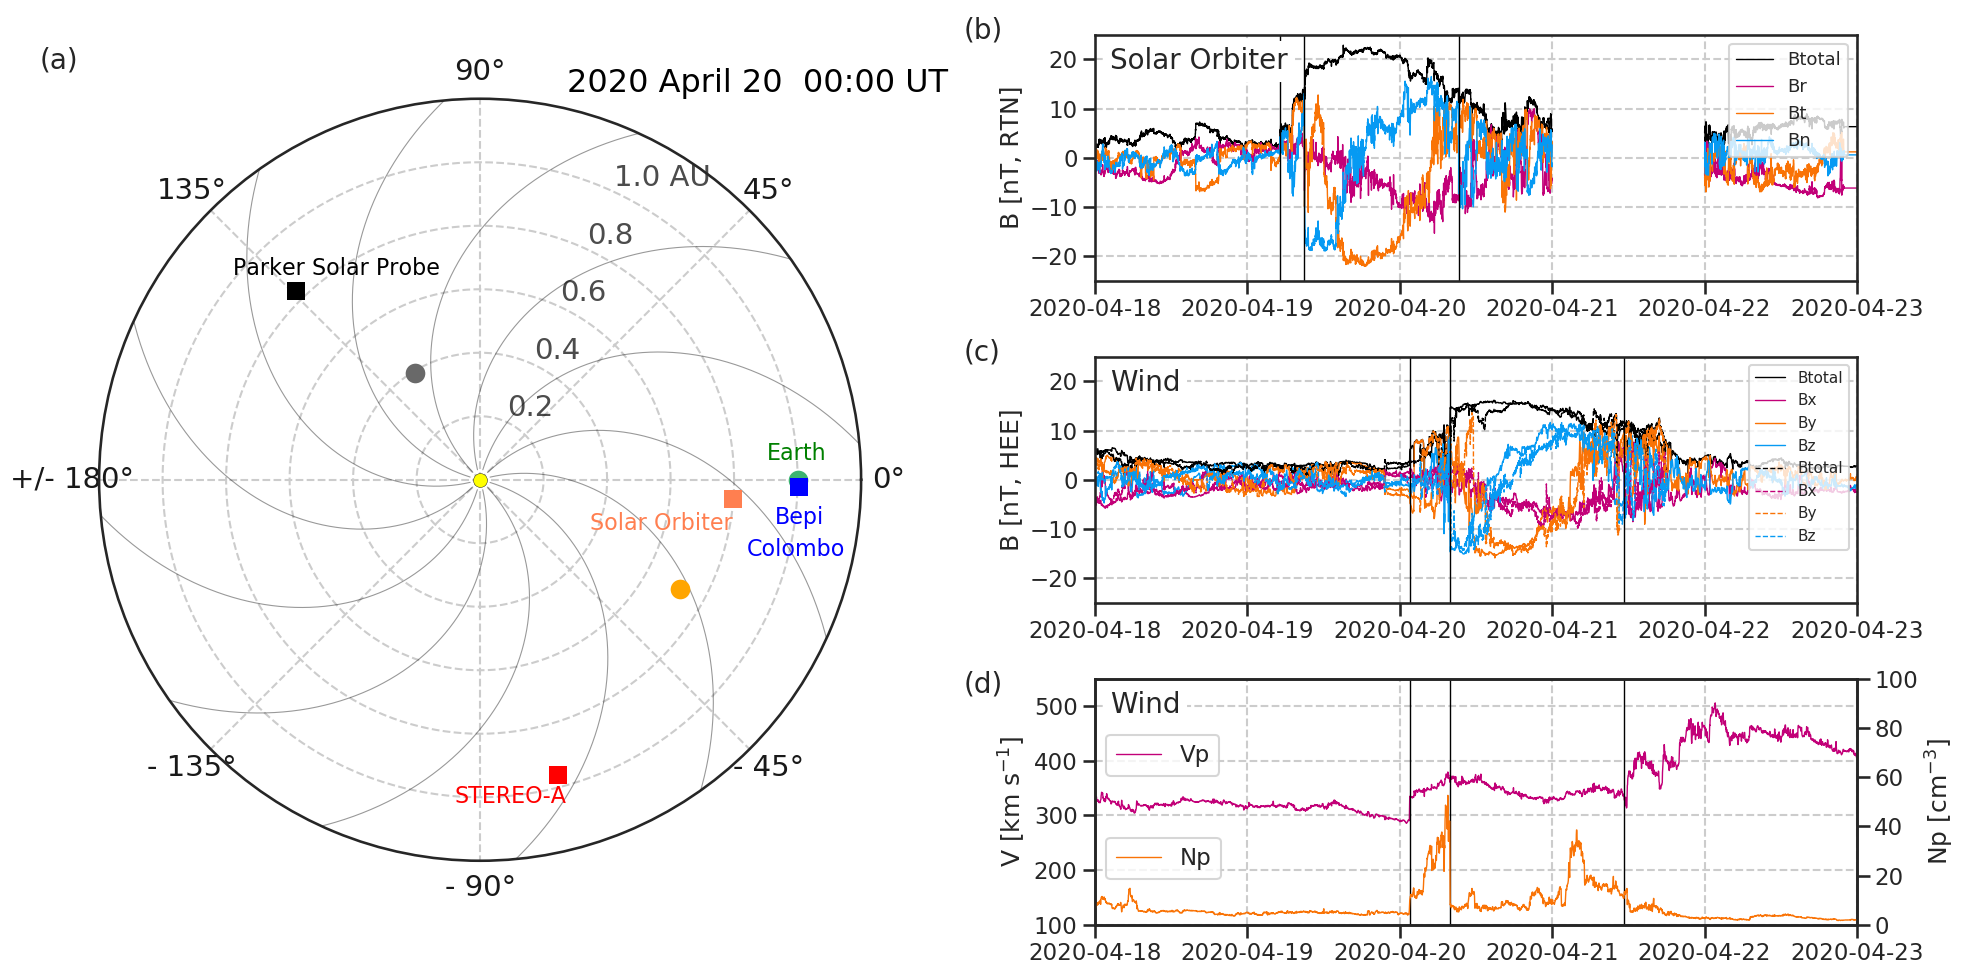

In [6]:
sns.set_context("talk")     
#sns.set_style('darkgrid')
sns.set_style('whitegrid')
sns.set_style("ticks",{'grid.linestyle': '--'})



#set wind awkward data points to nan
windspike_ind=np.where(win.time > parse_time('2020-04-20 17:08').datetime)[0]
win.bt[windspike_ind[0:2]]=np.nan
win.bx[windspike_ind[0:2]]=np.nan
win.by[windspike_ind[0:2]]=np.nan
win.bz[windspike_ind[0:2]]=np.nan


#set wind awkward data points to nan
windspike_ind=np.where(win.time > parse_time('2020-04-21 01:20').datetime)[0]
win.bt[windspike_ind[0:1]]=np.nan
win.bx[windspike_ind[0:1]]=np.nan
win.by[windspike_ind[0:1]]=np.nan
win.bz[windspike_ind[0:1]]=np.nan


plotstart=datetime.datetime(2020, 4, 18)
plotend=datetime.datetime(2020, 4,23)
blim=25

plt.figure(1,figsize=(20, 10),dpi=100)

#define subplot grid
ax1 = plt.subplot2grid((3, 2), (0, 1))  #solo b
ax2 = plt.subplot2grid((3, 2), (1, 1))  #wind b
ax4 = plt.subplot2grid((3, 2), (2, 1))  #wind v
ax3 = plt.subplot2grid((3, 2), (0, 0), rowspan=3, projection='polar') #positions


#########################################################################
backcolor='black'
psp_color='black'
bepi_color='blue'
solo_color='coral'

symsize_planet=200
symsize_spacecraft=150
fsize=20
plot_orbit=True
fadeind=150

plot_parker=True

AUkm=149597870.7   

#for parker spiral   
theta=np.arange(0,np.deg2rad(180),0.01)

#Coordinate System
#frame='HCI'
frame='HEEQ'
print(frame)

#sidereal solar rotation rate
if frame=='HCI': sun_rot=24.47
#synodic
if frame=='HEEQ': sun_rot=26.24

frame_time_num=mdates.date2num(parse_time('2020-Apr-20').datetime)
print( 'current frame_time_num', str(mdates.num2date(frame_time_num)))

#these have their own times
dct=frame_time_num-psp.time
psp_timeind=np.argmin(abs(dct))

dct=frame_time_num-bepi.time
bepi_timeind=np.argmin(abs(dct))

dct=frame_time_num-solo.time
solo_timeind=np.argmin(abs(dct))

dct=frame_time_num-sta.time
sta_timeind=np.argmin(abs(dct))

#all same times
dct=frame_time_num-earth.time
earth_timeind=np.argmin(abs(dct))


ax3.scatter(venus.lon[earth_timeind], venus.r[earth_timeind]*np.cos(venus.lat[earth_timeind]), s=symsize_planet, c='orange', alpha=1,lw=0,zorder=3)
ax3.scatter(mercury.lon[earth_timeind], mercury.r[earth_timeind]*np.cos(mercury.lat[earth_timeind]), s=symsize_planet, c='dimgrey', alpha=1,lw=0,zorder=3)
ax3.scatter(earth.lon[earth_timeind], earth.r[earth_timeind]*np.cos(earth.lat[earth_timeind]), s=symsize_planet, c='mediumseagreen', alpha=1,lw=0,zorder=3)
ax3.scatter(sta.lon[earth_timeind], sta.r[earth_timeind]*np.cos(sta.lat[earth_timeind]), s=symsize_spacecraft, c='red', marker='s', alpha=1,lw=0,zorder=3)
ax3.scatter(mars.lon[earth_timeind], mars.r[earth_timeind]*np.cos(mars.lat[earth_timeind]), s=symsize_planet, c='orangered', alpha=1,lw=0,zorder=3)

ax3.scatter(psp.lon[psp_timeind], psp.r[psp_timeind]*np.cos(psp.lat[psp_timeind]), s=symsize_spacecraft, c=psp_color, marker='s', alpha=1,lw=0,zorder=3)
ax3.scatter(bepi.lon[bepi_timeind], bepi.r[bepi_timeind]*np.cos(bepi.lat[bepi_timeind]), s=symsize_spacecraft, c=bepi_color, marker='s', alpha=1,lw=0,zorder=3)
ax3.scatter(solo.lon[solo_timeind], solo.r[solo_timeind]*np.cos(solo.lat[solo_timeind]), s=symsize_spacecraft, c=solo_color, marker='s', alpha=1,lw=0,zorder=3)
 

#parker spiral
if plot_parker:
    for q in np.arange(0,12):
        omega=2*np.pi/(sun_rot*60*60*24) #solar rotation in seconds
        v=400/AUkm #km/s
        r0=695000/AUkm
        r=v/omega*theta+r0*7
        ax3.plot(-theta+np.deg2rad(0+(360/24.47)*1+360/12*q), r, alpha=0.4, lw=0.8,color='black',zorder=1)

#set axes and grid
ax3.set_theta_zero_location('E')
#plt.thetagrids(range(0,360,45),(u'0\u00b0 '+frame+' longitude',u'45\u00b0',u'90\u00b0',u'135\u00b0',u'+/- 180\u00b0',u'- 135\u00b0',u'- 90\u00b0',u'- 45\u00b0'), ha='right', fmt='%d',fontsize=fsize-1,color=backcolor, alpha=0.9)
plt.thetagrids(range(0,360,45),(u'0\u00b0',u'45\u00b0',u'90\u00b0',u'135\u00b0',u'+/- 180\u00b0',u'- 135\u00b0',u'- 90\u00b0',u'- 45\u00b0'), ha='center', fmt='%d',fontsize=fsize+1,color=backcolor, alpha=0.9,zorder=4)

#plt.rgrids((0.10,0.39,0.72,1.00,1.52),('0.10','0.39','0.72','1.0','1.52 AU'),angle=125, fontsize=fsize,alpha=0.9, color=backcolor)
plt.rgrids((0.2,0.4,0.6,0.8,1.0),('0.2','0.4','0.6','0.8','1.0 AU'),angle=65, fontsize=fsize+1,alpha=0.7, color=backcolor)

#ax.set_ylim(0, 1.75) #with Mars
ax3.set_ylim(0, 1.2) 

#Sun
ax3.scatter(0,0,s=100,c='yellow',alpha=1, edgecolors='black', linewidth=0.3)



#spacecraft labels
ax3.text(psp.lon[psp_timeind]-0.2,psp.r[psp_timeind],'Parker Solar Probe', color=psp_color, ha='center',fontsize=fsize-4,verticalalignment='top')
ax3.text(solo.lon[solo_timeind]-0.05,solo.r[solo_timeind],'Solar Orbiter', color=solo_color, ha='right',fontsize=fsize-4,verticalalignment='top')
ax3.text(bepi.lon[bepi_timeind]-0.06,bepi.r[bepi_timeind],'Bepi', color=bepi_color, ha='center',fontsize=fsize-4,verticalalignment='top')
ax3.text(bepi.lon[bepi_timeind]-0.16,bepi.r[bepi_timeind],'Colombo', color=bepi_color, ha='center',fontsize=fsize-4,verticalalignment='top')
ax3.text(sta.lon[sta_timeind]-0.16,sta.r[sta_timeind],'STEREO-A', color='red', ha='center',fontsize=fsize-4,verticalalignment='top')
ax3.text(earth.lon[earth_timeind]+0.12,earth.r[earth_timeind],'Earth', color='green', ha='center',fontsize=fsize-4,verticalalignment='top')



#time
ax3.text(1.35,1.25,mdates.num2date(frame_time_num).strftime("%Y %B %d  %H:%M")+' UT',fontsize=fsize+3, ha='left',c='black')






#################### Solo MAG

ax1.plot(sm.time, sm.bt, "k-", lw=1,label='Btotal')
ax1.plot(sm.time, sm.bx, "r-", color="xkcd:magenta", lw=1, label='Br')
ax1.plot(sm.time, sm.by, "g-", color="xkcd:orange", lw=1,label='Bt')
ax1.plot(sm.time, sm.bz, "b-", color="xkcd:azure", lw=1,label='Bn')
    
#plot vertical lines
ax1.plot_date([sicme_start_time,sicme_start_time],[-500,500],'-k',linewidth=1)            
ax1.plot_date([smo_start_time,smo_start_time],[-500,500],'-k',linewidth=1)            
ax1.plot_date([smo_end_time,smo_end_time],[-500,500],'-k',linewidth=1)            

ax1.set_ylabel('B [nT, RTN]')
ax1.set_xlim(plotstart,plotend)
ax1.set_ylim(-blim,blim)
ax1.legend(loc=1,ncol=1,fontsize=13)
ax1.grid(True)


#position on figure
#textstart=plotstart+datetime.timedelta(hours=2)
#plt.text(textstart,25,'HEEQ R/lat/lon: '+str(np.round(sm.r[sicme_start_ind],3))+' ' +str(np.round(sm.lat[sicme_start_ind],2))+'  '+\
#         str(np.round(sm.lon[sicme_start_ind],2)),fontsize=13)

 
############################## Wind MFI
    
#plt.title('Wind MFI')

ax2.plot(win.time, win.bt, "k-", lw=1,label='Btotal')
ax2.plot(win.time, -win.bx,'-r', color="xkcd:magenta",linewidth=1,label='Bx')
ax2.plot(win.time, -win.by, "g-", color="xkcd:orange", lw=1,label='By')
ax2.plot(win.time, win.bz, "b-", color="xkcd:azure", lw=1,label='Bz')

ax2.plot(bm.time, bm.bt, "k--", lw=1,label='Btotal')
ax2.plot(bm.time, bm.bx,'--r', color="xkcd:magenta",linewidth=1,label='Bx')
ax2.plot(bm.time, bm.by, "g--", color="xkcd:orange", lw=1,label='By')
ax2.plot(bm.time, bm.bz, "b--", color="xkcd:azure", lw=1,label='Bz')


#plot vertical lines
ax2.plot_date([wicme_start_time,wicme_start_time],[-500,500],'-k',linewidth=1)            
ax2.plot_date([wmo_start_time,wmo_start_time],[-500,500],'-k',linewidth=1)            
ax2.plot_date([wmo_end_time,wmo_end_time],[-500,500],'-k',linewidth=1)            

ax2.set_ylabel('B [nT, HEE]')
ax2.set_xlim(plotstart,plotend)
ax2.set_ylim(-blim,blim)
ax2.legend(loc=1,ncol=1,fontsize=11)
ax2.grid(True)

#position on figure
#textstart=plotstart+datetime.timedelta(hours=2)
#plt.text(textstart,25,'HEEQ R/lat/lon: '+str(np.round(win.r[wicme_start_ind],3))+' ' +str(np.round(win.lat[wicme_start_ind],2))+'  '+\
#         str(np.round(win.lon[wicme_start_ind],2)),fontsize=13)


#plt.tight_layout()



############################## Wind SWE


#speed
ax4.plot(win.time, win.vt, color="xkcd:magenta",linewidth=1,label='Vp')

ax4.plot_date([wicme_start_time,wicme_start_time],[-500,1000],'-k',linewidth=1)            
ax4.plot_date([wmo_start_time,wmo_start_time],[-500,1000],'-k',linewidth=1)            
ax4.plot_date([wmo_end_time,wmo_end_time],[-500,1000],'-k',linewidth=1)            

ax4.set_ylabel('V [km $\mathrm{s^{-1}}$]')
ax4.set_xlim(plotstart,plotend)
ax4.set_ylim(100,550)
ax4.grid(True)



#density
ax5=ax4.twinx()
ax5.plot(win.time, win.np, color="xkcd:orange", lw=1,label='Np')
ax5.set_ylim(0,100)
ax5.set_ylabel('Np $[\mathrm{cm^{-3}}]$')

ax4.legend(loc=2,bbox_to_anchor=(0.0,0.82))
ax5.legend(loc=2,bbox_to_anchor=(0.0,0.4))



plt.tight_layout()

#annotations

plt.annotate('(a)',[0.02,0.93],xycoords='figure fraction',fontsize=20)
plt.annotate('(b)',[0.49,0.96],xycoords='figure fraction',fontsize=20)
plt.annotate('(c)',[0.49,0.63],xycoords='figure fraction',fontsize=20)
plt.annotate('(d)',[0.49,0.29],xycoords='figure fraction',fontsize=20)

ax2.text(0.02,0.86,'Wind',transform=ax2.transAxes,fontsize=20, bbox=dict(facecolor='white', alpha=1))
ax4.text(0.02,0.86,'Wind',transform=ax4.transAxes,fontsize=20,bbox=dict(facecolor='white', alpha=1))
ax1.text(0.02,0.86,'Solar Orbiter',transform=ax1.transAxes,fontsize=20,bbox=dict(facecolor='white', alpha=1))

plt.savefig('/home/cmoestl/pycode/heliocats/results/davies_2020/figure1_overview.png')
plt.savefig('/home/cmoestl/pycode/heliocats/results/davies_2020/figure1_overview.pdf')